In [2]:
#Description: Program uses dual moving average to determine when to buy or sell the stock
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [58]:
df = web.DataReader('GC=F', data_source='yahoo', start='2015-01-01', end ='2020-06-13')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,1194.500000,1169.500000,1184.000000,1186.000000,92.0,1186.000000
2015-01-05,1206.900024,1180.099976,1180.300049,1203.900024,138.0,1203.900024
2015-01-06,1220.000000,1203.500000,1203.500000,1219.300049,470.0,1219.300049
2015-01-07,1219.199951,1210.599976,1219.199951,1210.599976,97.0,1210.599976
2015-01-08,1215.699951,1206.300049,1207.000000,1208.400024,29.0,1208.400024
...,...,...,...,...,...,...
2020-06-08,1707.599976,1690.000000,1691.500000,1704.800049,84301221.0,1704.800049
2020-06-09,1729.400024,1697.599976,1701.300049,1721.199951,102298033.0,1721.199951
2020-06-10,1749.800049,1714.099976,1722.800049,1745.099976,80940203.0,1745.099976


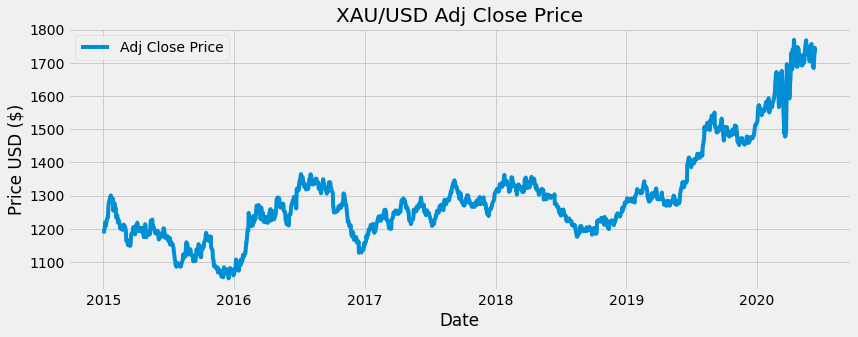

In [59]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'], label='Adj Close Price')
plt.title('XAU/USD Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [60]:
#Simple moving average for 30 day
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = df['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2020-06-08,1724.159998
2020-06-09,1724.463330
2020-06-10,1726.236662


In [61]:
#Simple moving average for 100 day
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = df['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2020-06-08,1668.479996
2020-06-09,1670.040996
2020-06-10,1671.805996


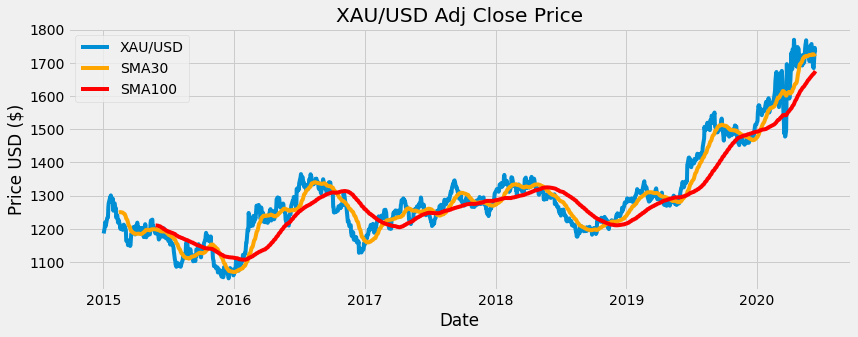

In [62]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'], label='XAU/USD')
plt.plot(SMA30['Adj Close Price'], label='SMA30', color='orange')
plt.plot(SMA100['Adj Close Price'], label='SMA100', color='red')
plt.title('XAU/USD Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()

If SMA100 crosses SMA30 mean is SELL. 

If SMA30 crosses SMA100 mean is BUY. Other words, If short term average  crosses long term average BUY.



In [63]:
data = pd.DataFrame()
data['XAUUSD'] = df['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data

,XAUUSD,SMA30,SMA100
Date,,,
2015-01-02,1186.000000,NaN,NaN
2015-01-05,1203.900024,NaN,NaN
2015-01-06,1219.300049,NaN,NaN
2015-01-07,1210.599976,NaN,NaN
2015-01-08,1208.400024,NaN,NaN
...,...,...,...
2020-06-08,1704.800049,1724.159998,1668.479996
2020-06-09,1721.199951,1724.463330,1670.040996
2020-06-10,1745.099976,1726.236662,1671.805996


In [0]:
#Function to signal for buying or selling the stock

def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag!= 1:
        sigPriceBuy.append(data['XAUUSD'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag!= 0:
         sigPriceBuy.append(np.nan)
         sigPriceSell.append(data['XAUUSD'][i])
         flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)



In [0]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [66]:
#Show the data
data

,XAUUSD,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2015-01-02,1186.000000,NaN,NaN,NaN,NaN
2015-01-05,1203.900024,NaN,NaN,NaN,NaN
2015-01-06,1219.300049,NaN,NaN,NaN,NaN
2015-01-07,1210.599976,NaN,NaN,NaN,NaN
2015-01-08,1208.400024,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-08,1704.800049,1724.159998,1668.479996,NaN,NaN
2020-06-09,1721.199951,1724.463330,1670.040996,NaN,NaN
2020-06-10,1745.099976,1726.236662,1671.805996,NaN,NaN


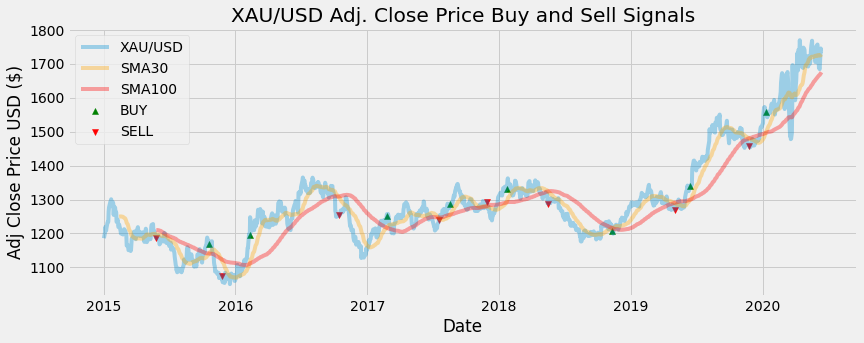

In [67]:
#Visualize the data and the strategy
plt.figure(figsize=(12.6,4.6))
plt.plot(data['XAUUSD'], label='XAU/USD', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', color='orange', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', color='red', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='BUY', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='SELL', marker='v', color='red')
plt.title('XAU/USD Adj. Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Adj Close Price USD ($)')
plt.legend()
plt.show()